# 1. Getting Started: Airbnb Copenhagen

This assignment deals with the most recent Airbnb listings in Copenhagen. The data is collected from [Inside Airbnb](http://insideairbnb.com/copenhagen). Feel free to explore the website further in order to better understand the data. The data (*listings.csv*) has been collected as raw data and needs to be preprocessed.

**Hand-in:** Hand in as a group in Itslearning in a **single**, well-organized and easy-to-read Jupyter Notebook. Please just use this notebook to complete the assignment.

If your group consists of students from different classes, upload in **both** classes.

The first cell does some preprocessing. Please just run these cells and do not change anything. The assignment starts below. Make sure that listings.csv' is in the same folder as this notebook




,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365,price_category
0,6983,Copenhagen 'N Livin',16774,Simon,Nørrebro,55.686410,12.547410,Entire home/apt,898.0,3,...,4.79,4.78,4.86,4.89,4.73,4.71,1.08,1,0,0
1,26057,Lovely house - most attractive area,109777,Kari,Indre By,55.693070,12.576490,Entire home/apt,2600.0,4,...,4.93,4.96,4.93,4.86,4.94,4.81,0.55,1,303,1
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,Indre By,55.676020,12.575400,Entire home/apt,3250.0,3,...,4.63,4.44,4.78,4.70,4.89,4.59,2.06,3,56,1
3,29118,Best Location in Cool Istedgade,125230,Nana,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,725.0,7,...,4.87,4.73,5.00,5.00,4.87,4.80,0.16,1,59,0
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,1954.0,3,...,4.82,4.88,4.87,4.82,4.80,4.53,0.13,1,0,1


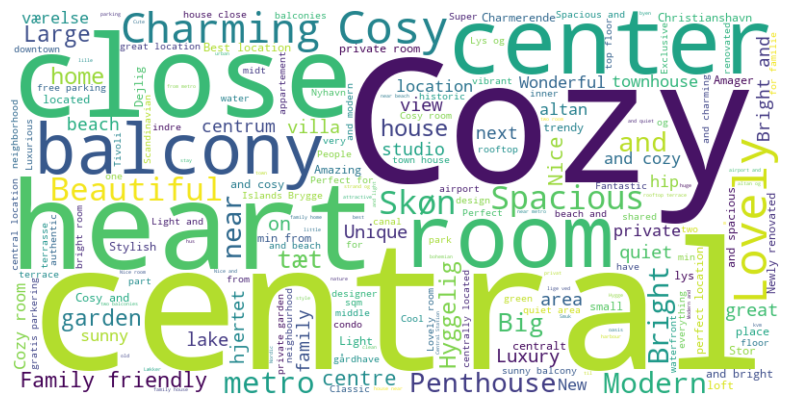

In [1]:
# pip install pandas
# pip install scikit-learn
import pandas as pd
import sklearn as sk

# load the data
data = pd.read_csv('listings.csv')

# filter relevant columns
data_limited = data[["id",
    "name",
    "host_id"  ,
    "host_name" , 
    "neighbourhood_cleansed"  ,
    "latitude"  ,
    "longitude"  ,
    "room_type"  ,
    "price"  ,
    "minimum_nights"  ,
    "number_of_reviews",  
    "last_review"  ,
    "review_scores_rating"  ,
    "review_scores_accuracy" , 
    "review_scores_cleanliness"  ,
    "review_scores_checkin"  ,
    "review_scores_communication"  ,
    "review_scores_location"  ,
    "review_scores_value"  ,
    "reviews_per_month"  ,
    "calculated_host_listings_count"  ,
    "availability_365",]]

# removing rows with no reviews

data_filtered = data_limited.loc[data_limited['number_of_reviews'] != 0]

# remove nan

data_filtered = data_filtered.dropna()
data_filtered.head()

# get a list of distinct values from neighbourhood_cleansed columns in data_filtered

neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()

# replace e.g. Nrrbro with Nørrebro in neighbourhood_cleansed column

data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Nrrebro", "Nørrebro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("sterbro", "Østerbro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Vanlse", "Vanløse")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Brnshj-Husum", "Brønshøj-Husum")
neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()

# Remove dollar signs and commas and convert to float - note the prices are actually in DKK
data_filtered['price'] = data_filtered['price'].replace('[\$,]', '', regex=True).astype(float)

# Calculate the median price
median_price = data_filtered['price'].median()

# Create a new column 'price_category' with 0 for 'affordable' and 1 for 'expensive'
data_filtered['price_category'] = (data_filtered['price'] > median_price).astype(int)

display(data_filtered.head())

# Describe the apartments using a wordcloud
# Remember to install packages
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine the two lists of stop words
stop_words = ['Østerbro', 'Copenhagen', 'København', 'in', 'bedroom', 'bedrooms', 'bed', 'beds', 'bath', 'baths', 'Frederiksberg', 'V', 'Ø', 'SV', 'S', 'N', 'K', 'C', 'W', 'kbh', 'Ballerup', 'Hellerup', 'Valby', 'Vanløse', 'Brønhøj', 'Nørrebro', 'Vesterbro', "CPH", "with", "to", "of", "a", "the", "på", "i", "med", "af", "at", "city", "by", "apartment", "appartment", "lejlighed", "flat", "m2", "apt"]

# Convert the 'name' column to a single string
text = ' '.join(data_filtered['name'].astype(str))

# Create and generate a word cloud image
wordcloud = WordCloud(stopwords=stop_words, background_color="white", width=800, height=400).generate(text)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Your tasks start here


### 1. Since data science is so much fun, provide a word cloud of the names of the hosts, removing any names of non-persons. Does this more or less correspond with the distribution of names according to [Danmarks Statistik](https://www.dst.dk/da/Statistik/emner/borgere/navne/navne-i-hele-befolkningen)?


Sørine
Harsimaranjit
Dora
Hope
Hannah
Ifigeneia
Rouslan
Laila
Grud
Gabriel
Unn
Nystrup
Marco
Kåre
Frida
Bernd
Hassan
Carolina
Vickie
Leonora
Place
Rita
Ani
Silia
Xavier
Edith
Wulff
Krüger
Moro
Magnus
Westh
Deniece
Petrus
Lundqvist
Stephanie
Timo
Umar
Kamil
Cristina
Audur
Nelson
Isabelle
Jan-Cayo
Svenn
Tranekær
Peter-Martin
Felicia
Abdel
Vidar
Francisco
Jakub
Gunver
Anthony
Due
Wraae
Engler
Michal
Babette
Helen
Ben
Robin
Kasper
Marianne
Viben
Eli
Karolis
Viki
Benedikte
Tofte
Radha
Wieben
MIkkel
Lale
Lui
Kellemann
Pernille
Herluf
Anne
Katarzyna
Marie-Louise
Biba
Zelina
Joseph
Dena
Freshta
Nuran
Nicola
Isuru
Saud
Nørfelt
Mie
Allyson
Müller
Fouchard
Kenny
Hana
Hoai
Johanne
Jeroen
Tanny
Laurence
Hauge
Didac
Regitze
Hani
Flagstad
Lucia
Agnethe
Thilde
Sampo
Hou-Vangsaae
Ditti
Ewa
Margot
Siv
W
Martin
Sanni
Nugzar
Anne-Kirstine
Gökhan
Michella
Flemming
D
Grethe
Petruska
Maelle
Poul
Lindeberg
Camille
Raphaël
Skjærbæk
Alsen
Donna
Ejgil
Chelina
Julian
Rind
Karenotilia
Riccardo
Als
Tracey
Tomasz
E

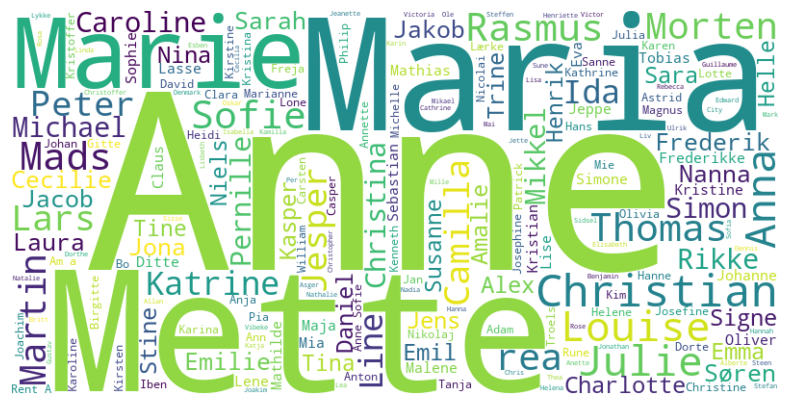

In [2]:
# State your solution here. Add more cells if needed.
# Credits: Laura Do Bem Rebelo
import re

import numpy

host_names = data_filtered["host_name"]
unique_host_names = host_names.unique().tolist()

# Identify substrings that are irrelevant and should be used to separate strings into substrings
separators = ['&', 'Og', 'And', 'and', '+', ' ', ',', '(', ')', '.', '/']

# Clean up the unique_host_names list
for i in range(0, len(unique_host_names)):    
    if any(substring in unique_host_names[i] for substring in separators):
        string_in_parts = re.split('|'.join(map(re.escape, separators)), unique_host_names[i])
        unique_host_names[i] = string_in_parts[0]
        for j in range(1, len(string_in_parts)):
            unique_host_names.append(string_in_parts[j])

# Clean up again (because there might have been some duplicates due to the .append)
unique_host_names = list(set(unique_host_names))

# Print all of the unique words found in the Host Names to then analyze them and look for words that are not names
for i in range(0, len(unique_host_names)):    
    print(unique_host_names[i])

# Join all the names from the host_name column into one string
host_names_string = ' '.join(data_filtered['host_name'].astype(str))
# Everytime one of the separators appears, replace it by a space
for substring in separators:
    host_names_string = host_names_string.replace(substring, " ")

# Words that are not names that were found and should be excluded from the Word Cloud
not_names = ['+', '.', '1A', 'Ac', 'Airbnb', 'ApS', 'Apartment', 'ApartmentinCopenhagen', 'Apartments', 'Artist',
             'Boulevard', 'Br', 'Café', 'Center', 'Central', 'Citadines', 'Collection', 'Copenhagen', 'Court',
             'Courtyard', 'Danhostel', 'Downtown', 'E', 'Email', 'F', 'Fly', 'Forenom', 'G', 'Genesis', 'Generator',
             'H', 'Hafen', 'Habitat', 'Harbor', 'Haven', 'Heaven', 'Hidden', 'HideAway', 'Holiday', 'Hostel',
             'House', 'Housing', 'I', 'Into', 'J', 'Jjj', 'K', 'L', 'Living', 'M', 'Mb', 'My', 'N', 'Neighborhood',
             'Oasis', 'Og', 'P', 'Palace', 'Palais', 'Park', 'Place', 'Plaza', 'Prime', 'Primo', 'Q', 'R', 'Regency',
             'Residence', 'Resort', 'Retreat', 'Royal', 'S', 'Sands', 'Silk', 'SleepCph', 'Square', 'Stadil', 'Star',
             'Studio', 'Suites', 'T', 'TheLine367', 'Th', 'This', 'Tower', 'Town', 'Tivoli', 'VG5', 'Village',
             'W', 'Waterfront', 'Z', 'Zoku', 'ers', 'e', 'er', 'hidden', 'i', 'ie', 'o', 'on', 'ra', 're', 'res', 'rew',
             't', 'y']

# Generate the word cloud :)
host_word_cloud = WordCloud(stopwords=not_names, background_color="white", width=800, height=400).generate(host_names_string)

# Display the generated word cloud

plt.figure(figsize=(10, 5))
plt.imshow(host_word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# And yes, it looks a lot like the most common Danish names! ahahahah

### 2. Using non-scaled versions of latitude and longitude, plot the listings data on a map.

c:\Users\fisch\anaconda3\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


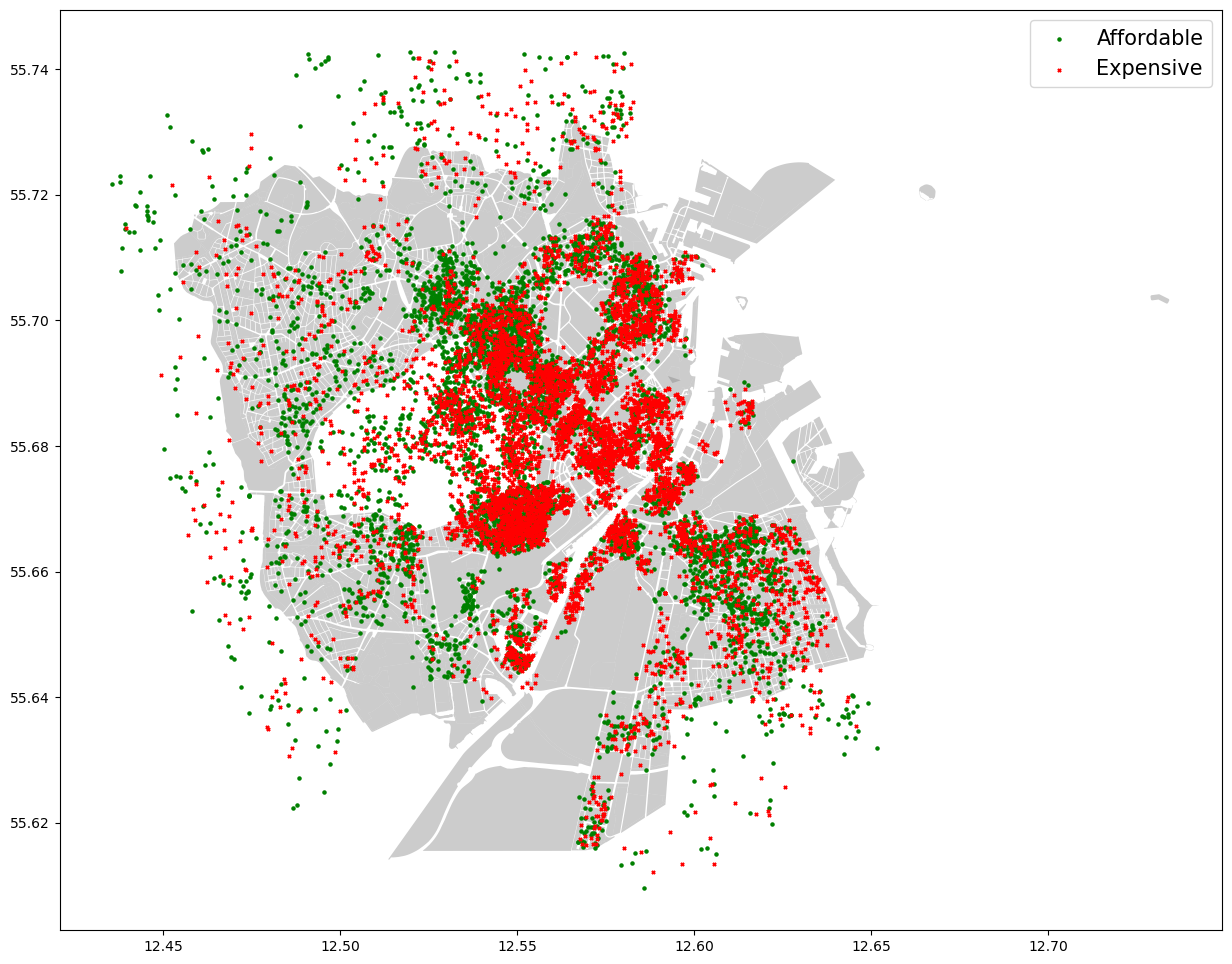

In [3]:
# Source of idea: https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972
# Source of Copenhagen map in .shp format: https://www.opendata.dk/city-of-copenhagen/karre
# Credits: Kamil Fischbach

import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

# Getting the street map, specifying the coordinate reference system, creating geometry system
street_map = gpd.read_file('karre.shp')
crs = {'init':'epsg:4326'}
geometry = [Point(xy) for xy in zip(data_filtered['longitude'], data_filtered['latitude'])]

geo_df = gpd.GeoDataFrame(data_filtered, 
                          crs=crs, 
                          geometry=geometry) 
geo_df.head()

fig, ax = plt.subplots(figsize=(15,15))
street_map.plot(ax=ax, alpha=0.4, color='grey')
# Adding the points on the map based on their price category
geo_df[geo_df['price_category'] == 0].plot(ax=ax, 
                                       markersize=5, 
                                       color='green', 
                                       marker='o', 
                                       label='Affordable')
geo_df[geo_df['price_category'] == 1].plot(ax=ax, 
                                       markersize=5, 
                                       color='red', 
                                       marker='x', 
                                       label='Expensive')
plt.legend(prop={'size':15})
# You can also read that in the markdown below the plot.
# As expected the expensive airbnb listings are in the center of Copenhagen and around its water bodies.
# There are more affordable accommodations outside of the city center. 
# However, one can still find considerable number of expensive listings all around Copenhagen.

 As expected the expensive airbnb listings are in the center of Copenhagen and around its water bodies.
 There are more affordable accommodations outside of the city center. 
 However, one can still find considerable number of expensive listings all around Copenhagen.

### 3. Create boxplots where you have the neighbourhood on the x-axis and price on the y-axis. What does this tell you about the listings in Copenhagen? Keep the x-axis as is and move different variables into the y-axis to see how things are distributed between the neighborhoods to create different plots (your choice).

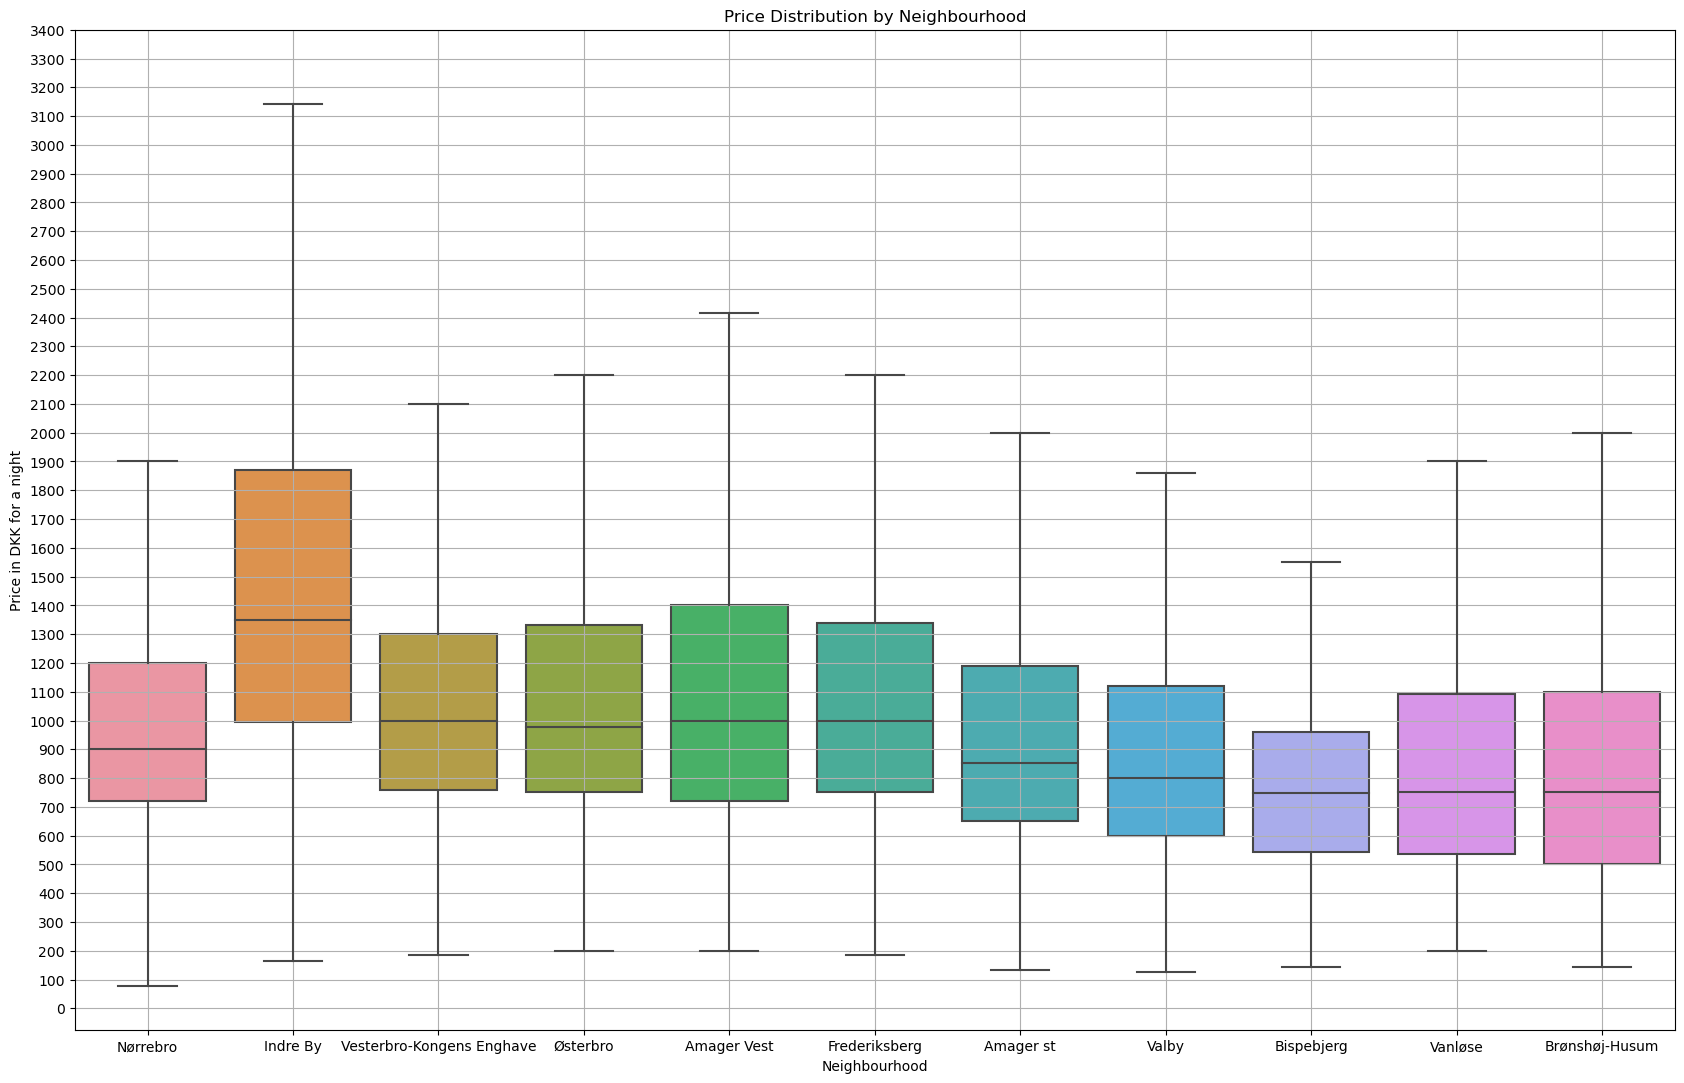

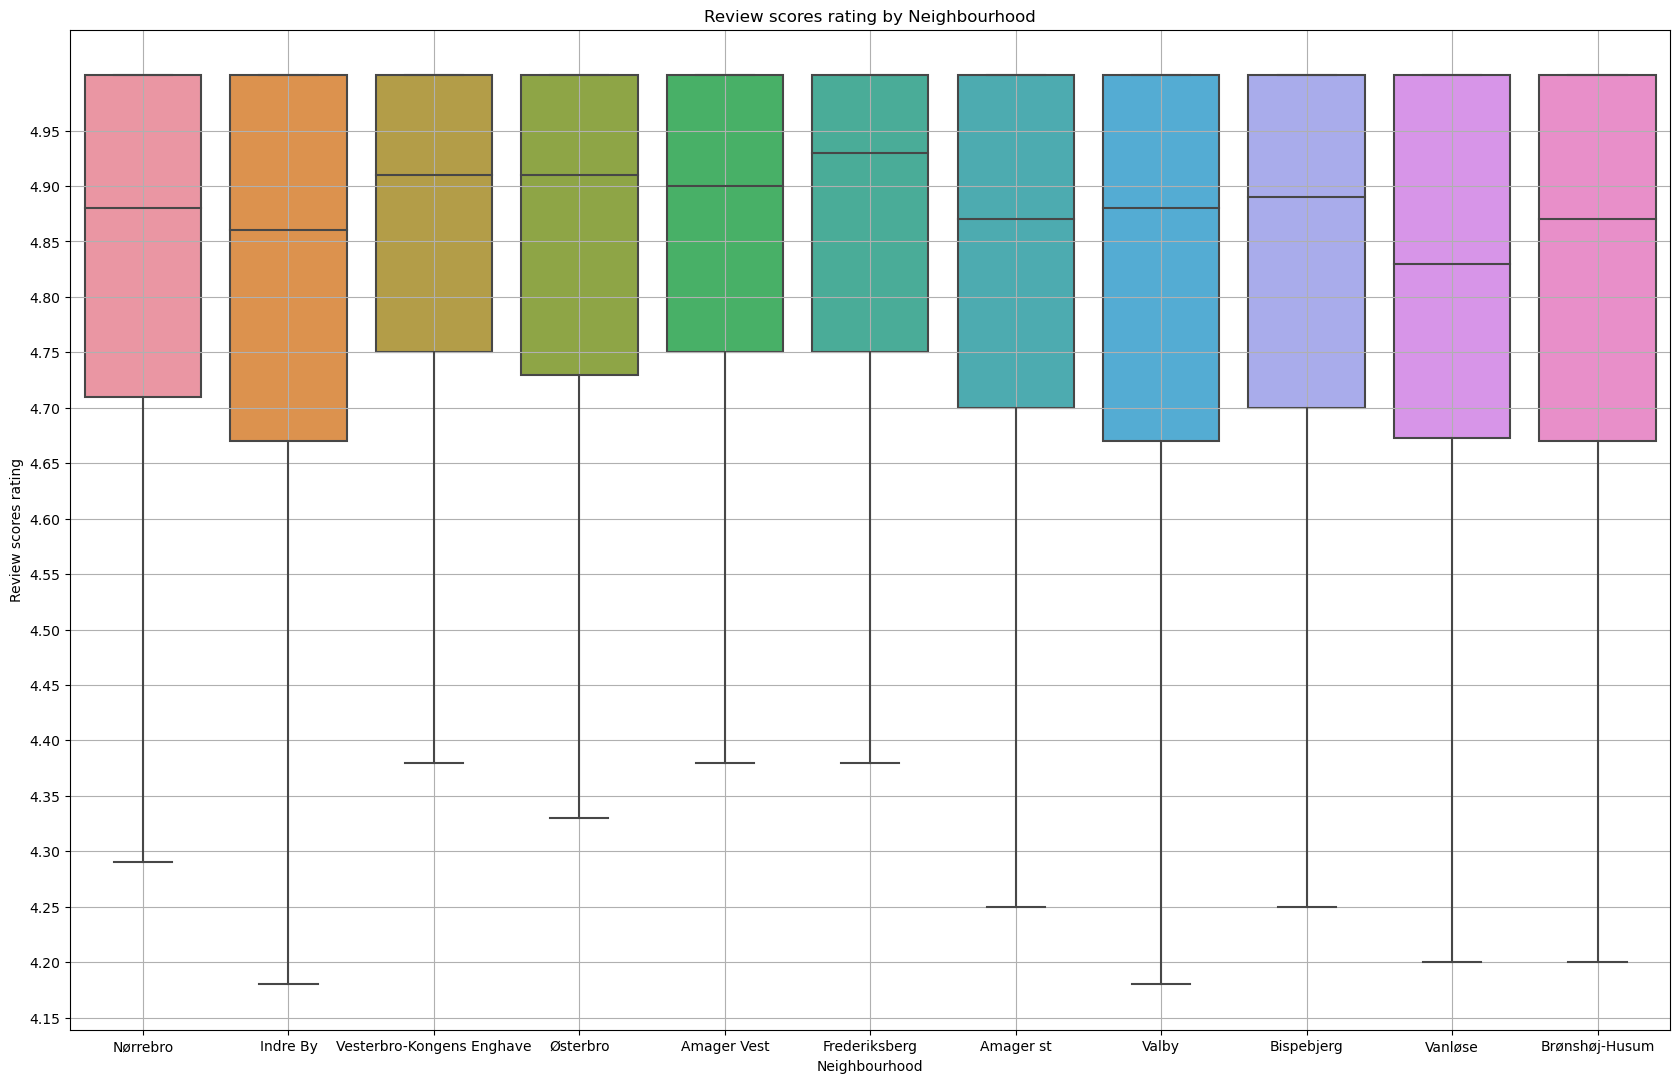

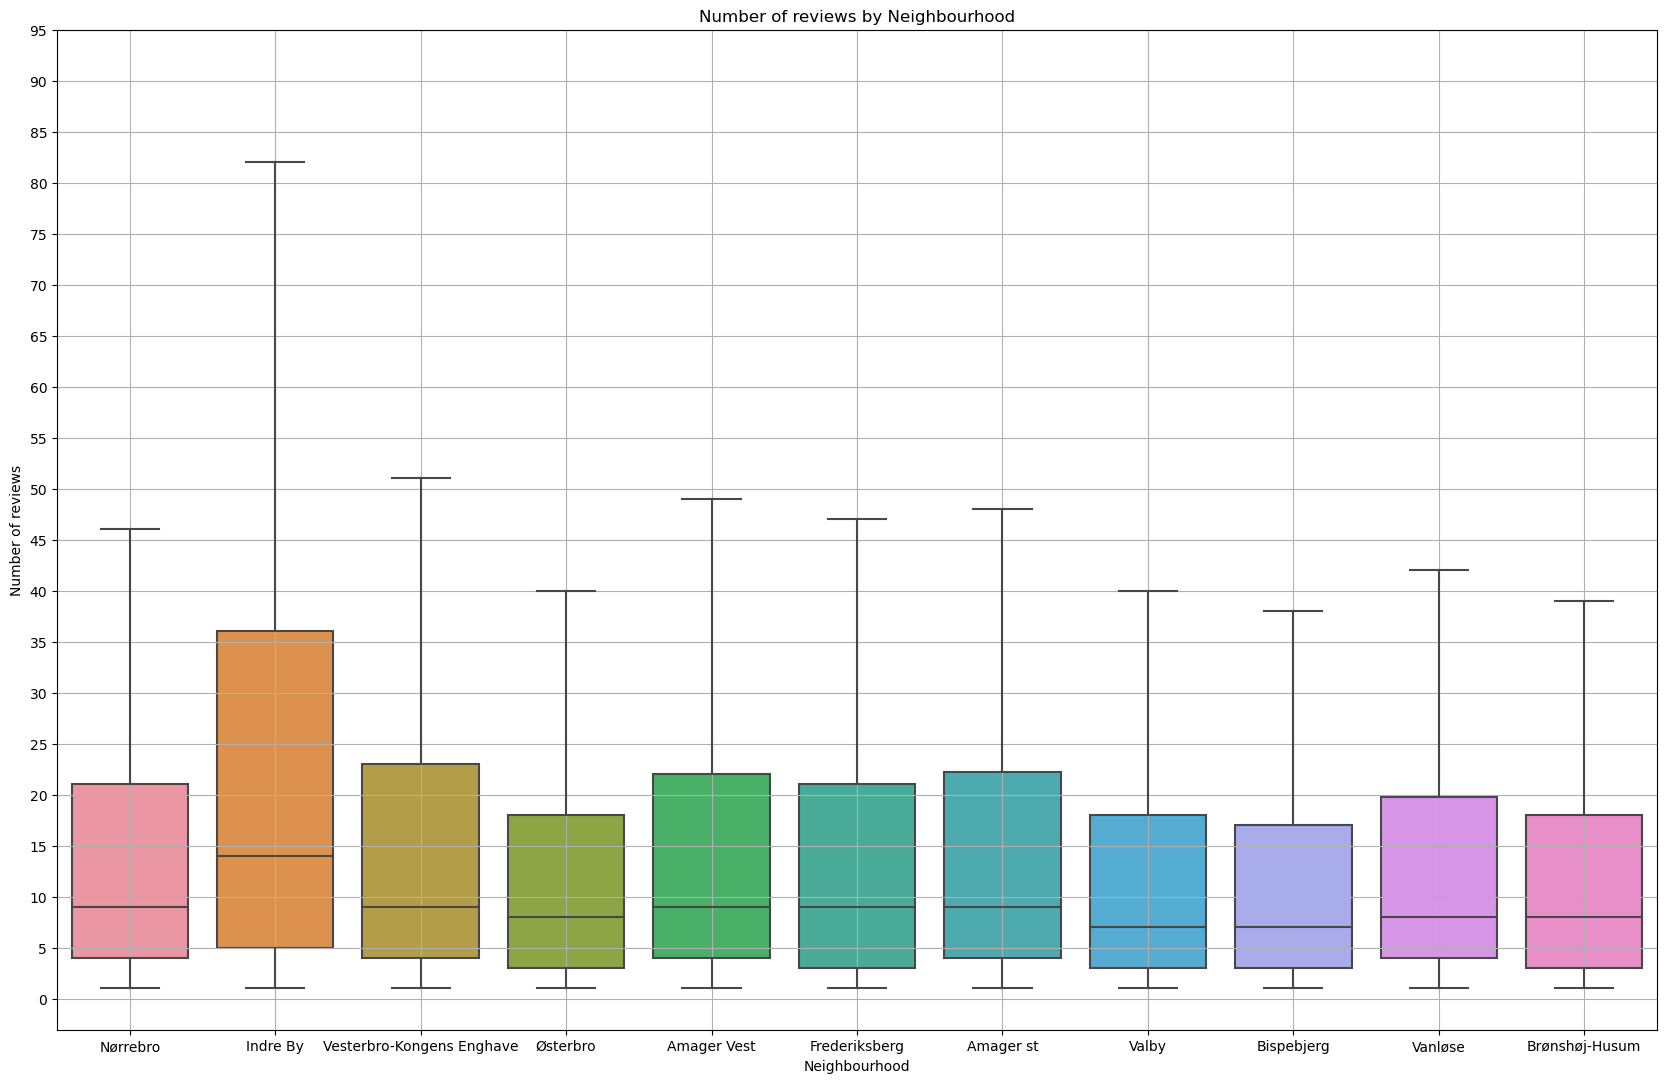

In [4]:
# State your solution here. Add more cells if needed.
# Credits: Kamil Fischbach
import seaborn as sns
import numpy as np
fig = plt.figure(figsize =(16, 10))


# Creating axes instance
ax = fig.add_axes([0, 0,1, 1])
 
# Creating plot 
sns.boxplot(data=data_filtered, x='neighbourhood_cleansed', y='price', showfliers=False)
plt.title('Price Distribution by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Price in DKK for a night')
plt.yticks(np.arange(0, 3500, 100))
plt.grid(True)
# plt.show()


fig = plt.figure(figsize =(16, 10))
# Creating axes instance
ax = fig.add_axes([0, 0,1, 1])
sns.boxplot(data=data_filtered, x='neighbourhood_cleansed', y='review_scores_rating', showfliers=False)
plt.title('Review scores rating by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Review scores rating')
plt.yticks(np.arange(4.15, 5, 0.05))
plt.grid(True)
# plt.show()

fig = plt.figure(figsize =(16, 10))
# Creating axes instance
ax = fig.add_axes([0, 0,1, 1])
sns.boxplot(data=data_filtered, x='neighbourhood_cleansed', y='number_of_reviews', showfliers=False)
plt.title('Number of reviews by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of reviews')
plt.yticks(np.arange(0,100, 5))
plt.grid(True)
plt.show()

# You can also read that in the markdown below the box plots.
# --Price Distribution by Neighbourhood--
#     The most expensive neighbourhood seems to be Indre By with a median around 1350 DKK/night.
#     Vesterbro, Osterbro, Amager Vest and Fredriksberg have very similar price distributions as well as median around 1000 DKK/night.
#     Bornshoj-Husum is the neighbourhood with the lowest value for Q1 and Q2 which makes it one of the cheapest options when looking for a place in Copenhagen.

# --Review scores rating by Neighbourhood--
#     The reviews are great for all of the listings in Copenhagen as all of the reviews are above 4 and their Q3 is 5.
#     After taking a closer look, one can see that Fredriksberg's median of ratings is the highest circulating around 4.93.
#     Surprisingly, Indre By and Valby share the lowest value for Q1 being slightly lower 4.70. The minimum values for those two neighbourhoods are lower than 4.20.

# --Number of reviews by Neighbourhood--
#     The reason explaining the low ratings for Indre By could be found in this box plot as this neighbourhood 
#     has the highest median of number of reviews per listing which is 14. It also has the highest number of reviews for Q3 reaching over 35.
#     Other than that, the rest of the neighbourhoods share the similar number of reviews where median is usually less than 10 and Q3 around 20.       

 --Price Distribution by Neighbourhood--
        The most expensive neighbourhood seems to be Indre By with a median around 1350 DKK/night.
     Vesterbro, Osterbro, Amager Vest and Fredriksberg have very similar price distributions as well as median around 1000 DKK/night.
     Bornshoj-Husum is the neighbourhood with the lowest value for Q1 and Q2 which makes it one of the cheapest options when looking for a place in Copenhagen.

 --Review scores rating by Neighbourhood--
        The reviews are great for all of the listings in Copenhagen as all of the reviews are above 4 and their Q3 is 5.
     After taking a closer look, one can see that Fredriksberg's median of ratings is the highest circulating around 4.93.
     Surprisingly, Indre By and Valby share the lowest value for Q1 being slightly lower 4.70. The minimum values for those two neighbourhoods are lower than 4.20.

 --Number of reviews by Neighbourhood--
        The reason explaining the low ratings for Indre By could be found in this box plot as this neighbourhood 
     has the highest median of number of reviews per listing which is 14. It also has the highest number of reviews for Q3 reaching over 35.
     Other than that, the rest of the neighbourhoods share the similar number of reviews where median is usually less than 10 and Q3 around 20.       

### 4. Do a descriptive analysis of the neighborhoods. Include information about room type in the analysis as well as one other self-chosen feature. The descriptive analysis should contain mean/average, mode, median, standard deviation/variance, minimum, maximum and quartiles.

In [3]:
# I will be doing a descriptive analysis of the room type by neighbourhood and also of the price.
# Credits: Laura Do Bem Rebelo
nbh_price = data_filtered[["price", "room_type", "neighbourhood_cleansed"]]

grouped_by_neighbourhood_only = nbh_price.groupby("neighbourhood_cleansed")
grouped_by_nbh_and_room_type = nbh_price.groupby(["neighbourhood_cleansed", "room_type"])
grouped_by_room_type_only = nbh_price.groupby("room_type")

def calculate_mode(df_grouped):
    list_of_dfs = [group for _, group in df_grouped]
    modes_list = []
    for df in list_of_dfs:
        mode = df.mode().values[0][0]
        modes_list.append(mode)

    stats = df_grouped.describe()
    stats['mode'] = modes_list
    return stats

def print_rounded(output):
    print(output.round(2))


nbh_and_room_stats = calculate_mode(grouped_by_nbh_and_room_type)

# wider display
pd.set_option('display.width', 500)



In [4]:
# Let's print out the statistical analysis grouped by neighbourhood and by room type separately to inspect those first.

print_rounded(calculate_mode(grouped_by_neighbourhood_only))
print_rounded(calculate_mode(grouped_by_room_type_only))

                            price                                                               mode
                            count     mean      std    min     25%     50%      75%      max        
neighbourhood_cleansed                                                                              
Amager Vest                1059.0  1205.75  2121.66  200.0  722.00  1000.0  1400.00  64900.0  1000.0
Amager st                   924.0  1019.86   704.77  135.0  650.00   851.0  1190.00  10000.0  1000.0
Bispebjerg                  604.0   912.07  1831.81  143.0  542.25   747.5   961.00  44000.0   700.0
Brønshøj-Husum              285.0   875.49   552.01  145.0  500.00   750.0  1100.00   4462.0   500.0
Frederiksberg              1177.0  1216.68  1866.62  185.0  750.00  1000.0  1339.00  58000.0  1000.0
Indre By                   1844.0  1570.91  1065.98  165.0  995.00  1350.0  1870.50  20000.0  1200.0
Nørrebro                   2057.0  1014.79   609.39   79.0  720.00   900.0  1199.00  12500.

In [8]:
# Upon inspection of the obtained values, here are some observations:
#
#     ##### BY NEIGHBOURHOOD #####
#    
#     - It looks like a loooooooot of apartments are priced at 1000 dkk per night since it's the mode of many neighbourhoods
#     - And Valby, Brønshøj-Husum and Bispebjerg seem like they are considerably cheaper places to stay at! Since their modes are lower
#     - There are many many many listings in Indre By, Norrebro and Vesterbro
#     - The standard price deviation for Amager Vest is huge, also because it contains the most expensive Airbnb in the dataset
#     - Amager Vest and Indre By seem like the most expensive places to stay at, because even the "lower range" of their listings has high values (min & q1)

#     #### BY ROOM TYPE ####
#     - By far, the most common type of listing in Copenhagen is entire homes/apartments - a fair s
#     - A fair share of those listings are priced at 1000dkk since that is the mode despite the large amount of listings
#     - There are very few shared rooms listed, but the few that are there are far more affordable than other room type options
#     - The cheapest listing on Airbnb for Copenhagen is a private room
#     - The most expensive listening on Airbnb for Copenhagen is also a private room!
#     - Which explains why the standard deviation value is the highest for this type of room

# Let's inspect the data by Room TYpe & Neighbourhood in the next cell to see what else we can observe.

In [5]:
print_rounded(calculate_mode(grouped_by_nbh_and_room_type))

                                            price                                                                 mode
                                            count     mean      std     min      25%     50%      75%      max        
neighbourhood_cleansed    room_type                                                                                   
Amager Vest               Entire home/apt   909.0  1234.23   832.70   250.0   814.00  1050.0  1480.00  14000.0  1000.0
                          Private room      148.0  1032.97  5299.02   200.0   400.00   500.0   655.00  64900.0   500.0
                          Shared room         2.0  1051.50   112.43   972.0  1011.75  1051.5  1091.25   1131.0   972.0
Amager st                 Entire home/apt   791.0  1093.58   721.98   240.0   700.00   900.0  1200.00  10000.0  1000.0
                          Hotel room          3.0  1296.00   211.18  1149.0  1175.00  1201.0  1369.50   1538.0  1149.0
                          Private room      129.

In [10]:
# Wow, so many numbers!
# Upon a closer look, here are some observations:
#     - The one expensive private room is in Amager Vest
#     - There are MANY entire homes/apartments in Indre By, Nørrebro and Vesterbro
#     - Nørrebro has the most private rooms
#     - The mean price of entire homes/apts in Indreby is 1642 dkk as opposed to shared rooms which is 292, meaning it would be drastically cheaper to share a room in that area than to rent an entire place.
#     - On that note, the mode (most occurring price) for Indreby private rooms is still just 450dkk despite there being 128 listings, further reinforcing the above point
#     - There is a gigantic price range in Østerbro for entire homes/apts, ranging from 268dkk all the way to 41800 dkk.
#     - The extremely high and low prices are outliers and should be investigated further.

### 5. Based on self-chosen features, develop a logistic regression mode and k-Nearest Neighbor model to determine whether a rental property should be classified as 0 or 1. Remember to divide your data into training data and test data. Comment on your findings.

In [11]:

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Credits: Laura Do Bem Rebelo
relevant_data = data_filtered[["price", "price_category"]]

data = relevant_data.drop(['price_category'], axis='columns')
labels = relevant_data['price_category']

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Logistic Regression
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)
log_reg_preds = log_reg_model.predict(X_test)
print("Logistic Regression accuracy score: {}".format(log_reg_model.score(data, labels)))

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_preds = knn_model.predict(X_test)
print("Knn neighbours accuracy score: {}".format(knn_model.score(data, labels)))

# Define the range of hyperparameters to test
neighbors_range = range(3, 20)  # Number of neighbors from 3 to 19
distance_metrics = ['euclidean', 'manhattan', ('minkowski')]  # Common distance metrics, only illustration, doesn't make sense!

# Variables to store the best parameters and highest accuracy
best_accuracy = 0
best_params = {'n_neighbors': None, 'metric': None}

# Nested loop to iterate over the hyperparameters
for n_neighbors in neighbors_range:
    for metric in distance_metrics:
        # Initialize the KNN model with current hyperparameters
        knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric)

        # Train the model
        knn.fit(X_train, y_train)

        # Make predictions on the test set
        predictions = knn.predict(X_test)

        # Calculate the accuracy
        accuracy = accuracy_score(y_test, predictions)

        # Update the best parameters if current accuracy is higher
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params['n_neighbors'] = n_neighbors
            best_params['metric'] = metric

# Print the best set of parameters and the highest accuracy achieved
print(f"Best parameters: Number of Neighbors - {best_params['n_neighbors']}, Distance Metric - {best_params['metric']}")
print(f"Highest Accuracy: {best_accuracy*100:.2f}%")


Logistic Regression accuracy score: 1.0
Knn neighbours accuracy score: 1.0
Best parameters: Number of Neighbors - 3, Distance Metric - euclidean
Highest Accuracy: 100.00%


In [12]:
import pandas as pd

def predict_price_category(price):
        # New data organized in a two-dimensional array 
    x_new = numpy.array([[price]])

    # Create a dataframe
    feature_names = data.columns.tolist()
    x_new_df = pd.DataFrame(x_new, columns=feature_names)
    predict = log_reg_model.predict(x_new_df)
    print("Prediction: {}".format(predict))

print('Testing cheap predictions')
print('270 dkk:')
predict_price_category(270)
print('979 dkk:')
predict_price_category(979)
print('Upon inspection, the boundary seems to be 980 because values higher than this return 1')
print('Testing expensive predictions')
print('980 dkk:')
predict_price_category(980)
print('2000 dkk:')
predict_price_category(2000)



Testing cheap predictions
270 dkk:
Prediction: [0]
979 dkk:
Prediction: [0]
Upon inspection, the boundary seems to be 980 because values higher than this return 1
Testing expensive predictions
980 dkk:
Prediction: [1]
2000 dkk:
Prediction: [1]


In [13]:
#### CONCLUSIONS ####

# Using the price as an indicator of affordability, the model can deem an apartment as affordable or expensive with 100% accuracy!
# While testing out predictions on different price values, it looked like the boundary for an apartment to be considered expensive
# is 980 dkk.

##### train another day also with the neighbourhoods to see what will be the accuracy :)))))

### Now, we will train the model with other features, potentially less accurate, to see what will be the accuracy of the predictions compared to using the price.
We will try to sort the data by using the features of the Neighbourhood and the Room Type and see what the accuracy is.


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

# Credits: Laura Do Bem Rebelo

# We will try to sort the data by using the features of the Neighbourhood and the Room Type.
relevant_data = data_filtered[["neighbourhood_cleansed", "room_type", "price_category"]]

data = relevant_data.drop(['price_category'], axis='columns')

# It was necessary to encode the data since the features were strings
le = OneHotEncoder()
data = le.fit_transform(data)

labels = relevant_data['price_category']

# Rename the data
X = data
y = labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Try to remove random_state

# Define the range of hyperparameters to test
neighbors_range = range(3, 20)  # Number of neighbors from 3 to 19
distance_metrics = ['euclidean', 'manhattan', ('minkowski')]  # Common distance metrics, only illustration, doesn't make sense!

# Variables to store the best parameters and highest accuracy
best_accuracy = 0
best_params = {'n_neighbors': None, 'metric': None}

# Nested loop to iterate over the hyperparameters
for n_neighbors in neighbors_range:
    for metric in distance_metrics:
        # Initialize the KNN model with current hyperparameters
        knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric)

        # Train the model
        knn.fit(X_train, y_train)

        # Make predictions on the test set
        predictions = knn.predict(X_test)

        # Calculate the accuracy
        accuracy = accuracy_score(y_test, predictions)

        # Update the best parameters if current accuracy is higher
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params['n_neighbors'] = n_neighbors
            best_params['metric'] = metric

# Print the best set of parameters and the highest accuracy achieved
print(f"Best parameters: Number of Neighbors - {best_params['n_neighbors']}, Distance Metric - {best_params['metric']}")
print(f"Highest Accuracy: {best_accuracy*100:.2f}%")


Best parameters: Number of Neighbors - 19, Distance Metric - euclidean
Highest Accuracy: 61.79%


The accuracy when using the features of Neighbourhood and Room Type is 62%... Which is not very good, but it was an experiment, and at least it's still above 50% so it wasn't that bad of a choice of features!